In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

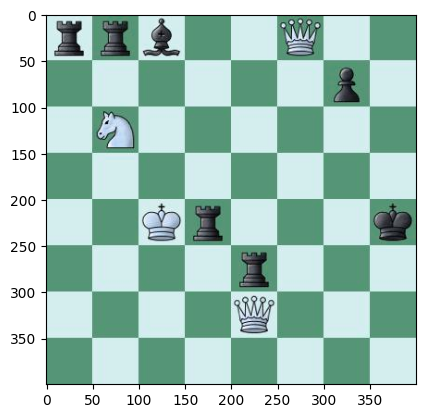

In [2]:

# Load the image
image = cv2.imread(
    'data/raw/rrb2Q2-6p1-1N6-8-2Kr3k-4r3-4Q3-8.jpeg')
plt.imshow(image)

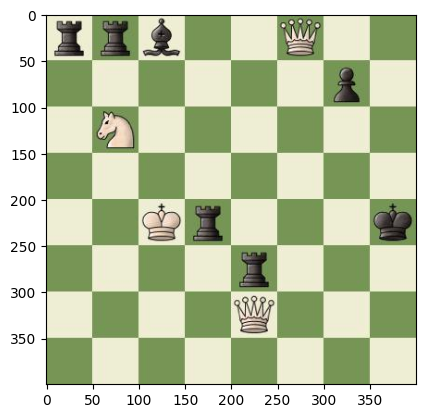

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

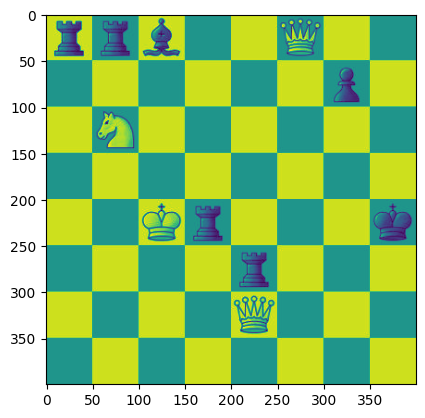

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

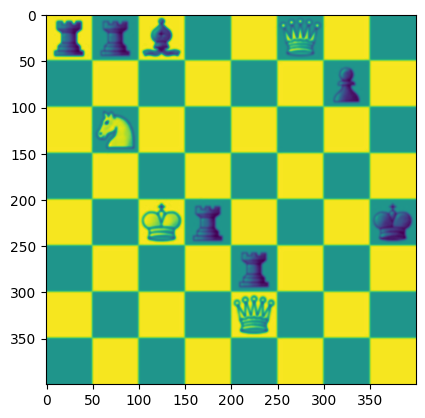

In [5]:
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(gray_blurred)

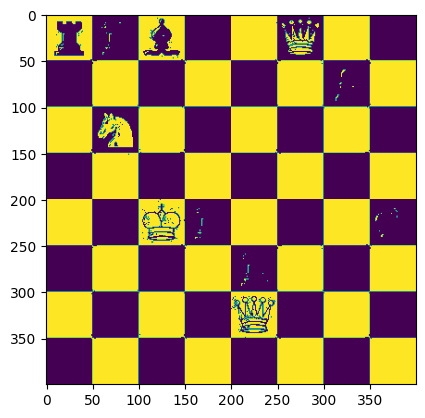

In [6]:
lwr = np.array([0, 0, 143])
upr = np.array([179, 61, 252])
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
msk = cv2.inRange(hsv, lwr, upr)
plt.imshow(msk)

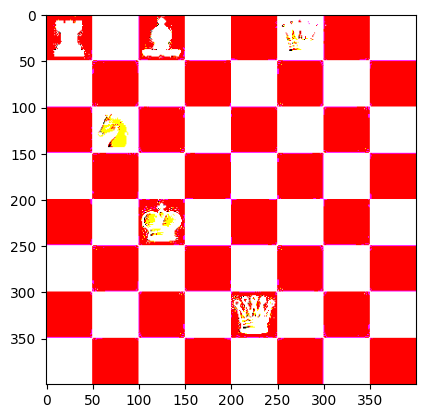

In [7]:
(T, threshInv) = cv2.threshold(image, 230, 255,
                               cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)

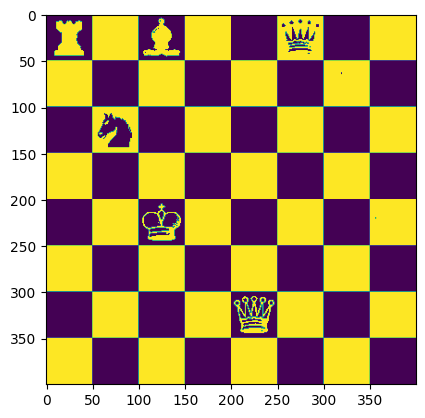

In [8]:
(T, threshInv) = cv2.threshold(gray, 0, 255,
                               cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(threshInv)

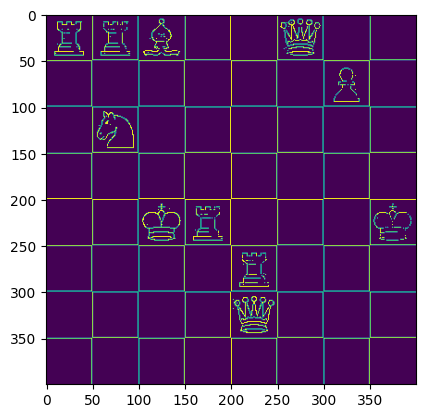

In [21]:
thresh = cv2.adaptiveThreshold(gray, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 3, 20)
plt.imshow(thresh)

In [10]:
krn = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 30))
dlt = cv2.dilate(msk, krn, iterations=5)
res = 255 - cv2.bitwise_and(dlt, msk)

In [11]:
res = np.uint8(res)
ret, corners = cv2.findChessboardCorners(res, (7, 7),
                                         flags=cv2.CALIB_CB_ADAPTIVE_THRESH +
                                         cv2.CALIB_CB_FAST_CHECK +
                                         cv2.CALIB_CB_NORMALIZE_IMAGE)
if ret:
    print(corners)
    fnl = cv2.drawChessboardCorners(image, (7, 7), corners, ret)
    cv2.imshow("fnl", fnl)
    # cv2.waitKey(0)
else:
    print("No Checkerboard Found")

No Checkerboard Found
